Gender equality has been one of the hot topics for long time. There have been numerous stucdies, activities, and even law changes in order order to improve the gender equalities. Altghouh there is visible development in this regard, There is still more to do.

In this project I will analyze the gender equality or improvement in the movie industry. For that purpose, Bechdel Test will be employed. The Bechdel Test is comming from the idea that Alison Bechdel introduced in a comic strip  and it has simple rules:
1. At least two women
2. The women need to talk to each other
3. They need to talk to each other about something other than a man  


<!-- ![img]("https://images.unsplash.com/photo-1603202662706-62ead3176b8f?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=669&q=80")
 -->

The requirement of Bechdel Test is uncomplicated and asumming the majority of movies will be succesfull in terms of gender equality. 

### Looked for Couple of Insight 

  1. Any Change of woman employment in movies over the years.
  2. The relationship of movie budget and woman employment if any.
  3. Female director imapct on the woman employment rate.
  4. Movie budget imapct on the woman employment rate.
  5. The woman employment rate impact on the movie revenue imapact.


  

In [3]:
# Importing Data From bechdeltest.com by their API
df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')


In [4]:
df.head()

,rating,imdbid,year,id,title
0,0,3155794,1874,9602,Passage de Venus
1,0,14495706,1877,9804,La Rosace Magique
2,0,2221420,1878,9603,Sallie Gardner at a Gallop
3,0,12592084,1878,9806,Le singe musicien
4,0,7816420,1881,9816,Athlete Swinging a Pick


<!-- <iframe src = "/img/bechdel/table.html" height = "350px" width = "100%"></iframe> -->

There are five features in data frame. Rating is the most I will work on because here it will be the main criteria to check if the movie pass the test or not. Rating less than 3 means failre while greater than 3 means pass.

Since the world does not have such a succes on gender equality in past let`s analyze data after 1970s. 

In [5]:
df['rating'].value_counts()

3    5451
1    2085
0    1069
2     965
Name: rating, dtype: int64

In [6]:
data_bechdel = df[df['year']>=1970]
data_bechdel.head()

,rating,imdbid,year,id,title
1356,0,0065531,1970,255,Le Cercle Rouge
1357,3,0065466,1970,583,Beyond the Valley of the Dolls
1358,3,0065421,1970,1122,"AristoCats, The"
1359,1,0066327,1970,1726,Santa Clause is Comin&#39; to Town
1360,1,0064806,1970,1932,"Phantom Tollbooth, The"


I am now going to rename the column ‘rating’ to ‘Bechdel Score’, to make things clearer for the rest of the analysis.

In [7]:
data_bechdel.rename(columns={'rating':'Bechdel Score'},inplace=True)

In [8]:
data_bechdel.head()

,Bechdel Score,imdbid,year,id,title
1356,0,0065531,1970,255,Le Cercle Rouge
1357,3,0065466,1970,583,Beyond the Valley of the Dolls
1358,3,0065421,1970,1122,"AristoCats, The"
1359,1,0066327,1970,1726,Santa Clause is Comin&#39; to Town
1360,1,0064806,1970,1932,"Phantom Tollbooth, The"


<!-- <iframe src = "/img/bechdel/table2. html" height = "350px" width = "100%"></iframe> -->

Here I am going to convert the ‘year’ column into a datetime object to analyze data. easily.

In [9]:
data_bechdel['year'] = pd.to_datetime( data_bechdel['year'],format='%Y')

In [10]:
data_bechdel

,Bechdel Score,imdbid,year,id,title
1356,0,0065531,1970-01-01,255,Le Cercle Rouge
1357,3,0065466,1970-01-01,583,Beyond the Valley of the Dolls
1358,3,0065421,1970-01-01,1122,"AristoCats, The"
1359,1,0066327,1970-01-01,1726,Santa Clause is Comin&#39; to Town
1360,1,0064806,1970-01-01,1932,"Phantom Tollbooth, The"
...,...,...,...,...,...
9565,1,13145534,2022-01-01,10370,Incroyable mais vrai
9566,2,10298810,2022-01-01,10371,Lightyear
9567,3,3513500,2022-01-01,10372,Chip &#39;n Dale: Rescue Rangers
9568,1,14169960,2022-01-01,10375,All of Us Are Dead


Next,  Bechdel Scores needs to be converted to categorical variables.

In [11]:
data_bechdel['Bechdel Score'] = data_bechdel['Bechdel Score'].astype('category',copy=False)

In [12]:
data_bechdel.head()

,Bechdel Score,imdbid,year,id,title
1356,0,0065531,1970-01-01,255,Le Cercle Rouge
1357,3,0065466,1970-01-01,583,Beyond the Valley of the Dolls
1358,3,0065421,1970-01-01,1122,"AristoCats, The"
1359,1,0066327,1970-01-01,1726,Santa Clause is Comin&#39; to Town
1360,1,0064806,1970-01-01,1932,"Phantom Tollbooth, The"


In [13]:
data_bechdel.describe()
data_bechdel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8214 entries, 1356 to 9569
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bechdel Score  8214 non-null   category      
 1   imdbid         8214 non-null   object        
 2   year           8214 non-null   datetime64[ns]
 3   id             8214 non-null   int64         
 4   title          8214 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 329.1+ KB


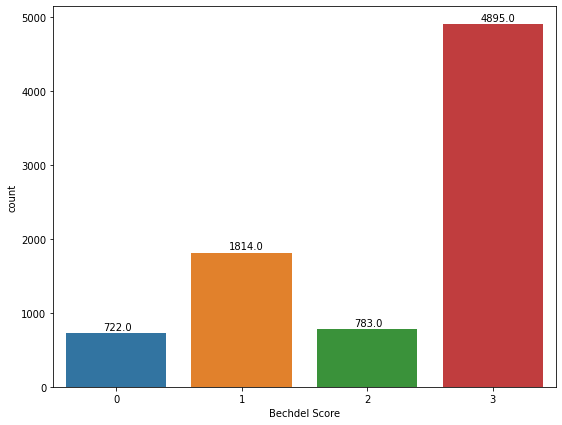

In [14]:

from matplotlib.pyplot import figure
import seaborn as sns
figure(figsize=(9,7))
ax = sns.countplot(x='Bechdel Score',data= data_bechdel);
for f in ax.patches:
    ax.annotate('{:.1f}'.format(f.get_height()), (f.get_x()+0.3, f.get_height()+40))



<!-- <iframe src = "/img/bechdel/graph.png" height = "350px" width = "100%"></iframe> -->

In [15]:
# Lets check if the movies pass bechdel test
li = []
for i in data_bechdel['Bechdel Score']:
  if(i<3):
    li.append(0)
  else:
    li.append(1)

data_bechdel['pass'] = li
data_bechdel.head()
data_bechdel['pass'].value_counts()

1    4895
0    3319
Name: pass, dtype: int64

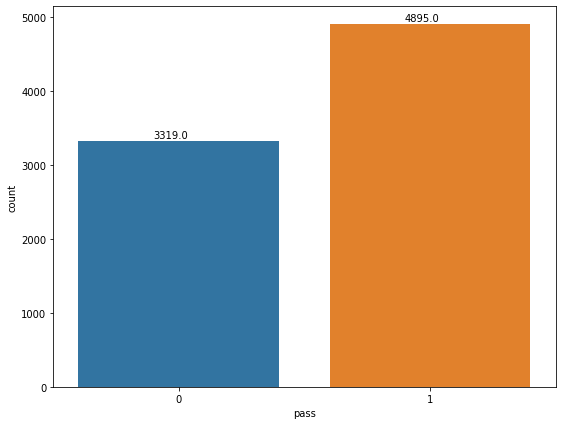

In [16]:
figure(figsize=(9,7))
ax = sns.countplot(data=data_bechdel,x='pass')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+40))


<!-- <iframe src = "/img/bechdel/graph2.png" height = "350px" width = "100%"></iframe> -->

Lets Check the relationship between Imdb rating and bechdel scores

In [18]:
from pandas.core.reshape.merge import merge

url = r"https://raw.githubusercontent.com/Natassha/Bechdel-Test/master/movies.csv"
imdb = pd.read_csv(url,encoding='cp1252')
imdb.head()
imdbNew = imdb[['title','rating']]
imdbNew

,title,rating
0,$,6.4
1,$1000 a Touchdown,6.0
2,$21 a Day Once a Month,8.2
3,"$40,000",8.2
4,"$50,000 Climax Show, The",3.4
...,...,...
58783,tom thumb,6.5
58784,www.XXX.com,1.1
58785,www.hellssoapopera.com,6.6
58786,xXx,5.5


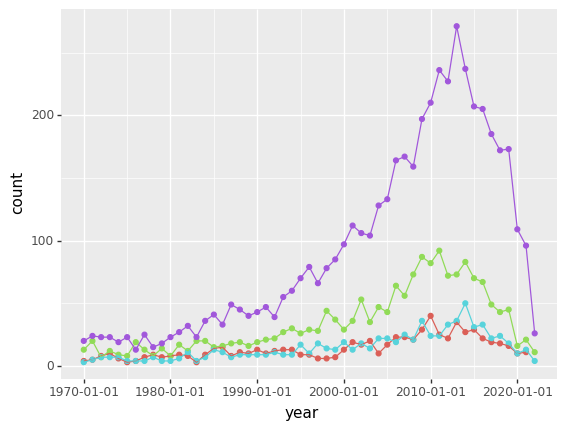

<ggplot: (8762740129624)>

In [19]:
(ggplot(data_bechdel)+geom_point(aes('year',color=data_bechdel['Bechdel Score']),stat='count',show_legend=False)+geom_line(aes('year',color=data_bechdel['Bechdel Score']),stat='count',show_legend=False))


<!-- <iframe src = "/img/bechdel/table3.png" height = "350px" width = "100%"></iframe> -->

In [20]:
data_bechdel = pd.merge(data_bechdel,imdbNew, how ='left',
                 left_on = ['title'], right_on = ['title'])

In [21]:

data_bechdel.head()
data_bechdel['rating'].value_counts().sort_index(ascending=False)

9.9    1
9.8    3
9.6    2
9.5    1
9.4    1
      ..
1.9    2
1.8    2
1.7    1
1.6    2
1.2    1
Name: rating, Length: 81, dtype: int64

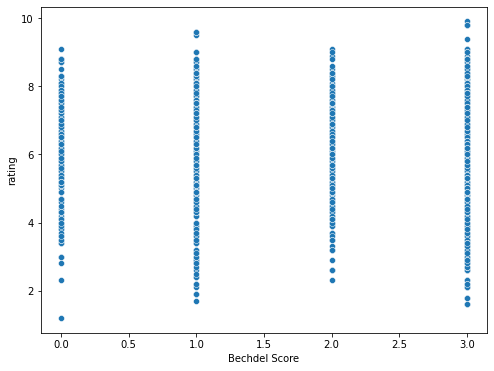

In [22]:
figure(figsize=(8,6))
sns.scatterplot(x =data_bechdel['Bechdel Score'],
                y = data_bechdel['rating'],data=data_bechdel);

<!-- <iframe src = "/img/bechdel/graph4.png" height = "350px" width = "100%"></iframe> -->

In [23]:
# Droping rows with null values
data_bechdel.dropna(inplace=True)
data_bechdel.drop('id',axis=1,inplace=True)

Creaing new dataframe with only year, bechdel score and rating

In [24]:
new = data_bechdel.groupby(['year','Bechdel Score']).agg({'rating':'mean'}).reset_index()
new.head()


,year,Bechdel Score,rating
0,1970-01-01,0,7.150000
1,1970-01-01,1,7.054545
2,1970-01-01,2,6.866667
3,1970-01-01,3,6.440000
4,1971-01-01,0,6.875000


<!-- <iframe src = "/img/bechdel/table4.html" height = "350px" width = "100%"></iframe> -->

## Visualizing the relationship

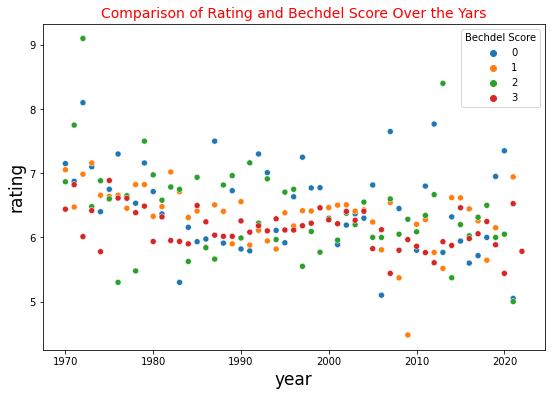

In [26]:

fig, ax = plt.subplots(figsize=(9, 6))
p = sns.scatterplot(x = 'year', y = 'rating',hue='Bechdel Score', data = new,ax=ax)
p.set_xlabel('year', fontsize = 17)
p.set_ylabel('rating', fontsize = 17)
p.set_title('Comparison of Rating and Bechdel Score Over the Yars', fontsize = 14, color='red');

<!-- <iframe src = "/img/bechdel/graph5.png" height = "350px" width = "100%"></iframe> -->

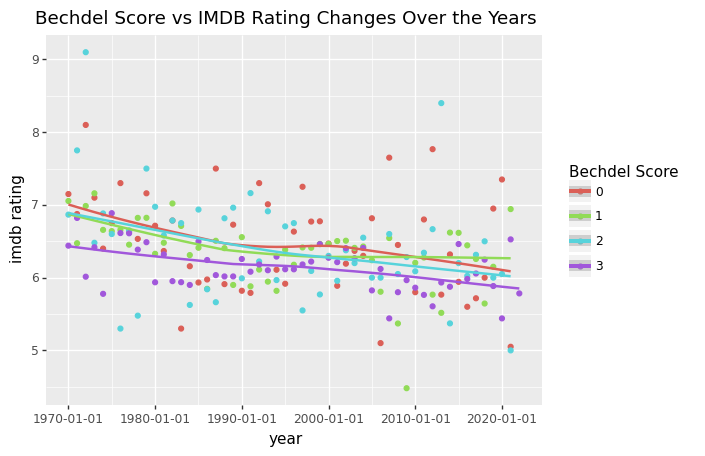

<ggplot: (8762740129783)>

In [27]:
# Plot year against IMDB rating and Bechdel Score:
ggplot(new,aes(x='year',y='rating',color='Bechdel Score'))+ geom_point()+geom_smooth()+scale_y_continuous(name="imdb rating")+labs( colour='Bechdel Score' )+ ggtitle("Bechdel Score vs IMDB Rating Changes Over the Years")

<!-- <iframe src = "/img/bechdel/graph6.png" height = "350px" width = "100%"></iframe> -->

It appears as though movies that pass the Bechdel test have significantly lower IMDB ratings compared to movies that don’t, which was pretty surprising to me.

Now, I will try to visualize the relationship between the gender of the director and Bechdel scores. I assume that movies with female directors are more likely to have higher Bechdel scores, which I will try to plot here.

In [28]:
url = r"https://raw.githubusercontent.com/Natassha/Bechdel-Test/master/movielatest.csv"
latest = pd.read_csv(url,encoding='cp1252')
latest.head()
dfLatest = latest[['name','director']]
dfLatest.rename(columns={'name':'title'}, inplace=True)
data_combined = pd.merge(data_bechdel, dfLatest, how='left', left_on=['title'], right_on=['title'])
data_combined = data_combined.dropna()
data_combined.head()



,Bechdel Score,imdbid,year,title,pass,rating,director
35,1,0067800,1971-01-01,Straw Dogs,0,7.4,Rod Lurie
36,1,0067741,1971-01-01,Shaft,0,6.5,John Singleton
37,1,0067741,1971-01-01,Shaft,0,6.0,John Singleton
53,1,0067128,1971-01-01,Get Carter,0,7.4,Stephen Kay
54,1,0067128,1971-01-01,Get Carter,0,4.7,Stephen Kay


<!-- <iframe src = "/img/bechdel/table5.html" height = "350px" width = "100%"></iframe> -->

The newly created data frame now has an additional variable in it; director. I will now try to predict the gender of the director given their first name, and append it to the data frame.

In [29]:
# !pip install gender-guesser


In [30]:

import gender_guesser.detector as gen
# Predicting gender of director from first name:
d = gen.Detector()
genders = []
firstNames = data_combined['director'].str.split().str.get(0)
for i in firstNames[0:len(firstNames)]:
    if d.get_gender(i) == 'male':
        genders.append('male')
    elif d.get_gender(i) == 'female':
        genders.append('female')
    else:
        genders.append('unknown')
data_combined['gender'] = genders
data_combined = data_combined[data_combined['gender'] != 'unknown']
# Encode the variable gender into a new dataframe:
data_combined['Male'] = data_combined['gender'].map( {'male':1, 'female':0} )
data_combined.head()


,Bechdel Score,imdbid,year,title,pass,rating,director,gender,Male
35,1,0067800,1971-01-01,Straw Dogs,0,7.4,Rod Lurie,male,1
36,1,0067741,1971-01-01,Shaft,0,6.5,John Singleton,male,1
37,1,0067741,1971-01-01,Shaft,0,6.0,John Singleton,male,1
53,1,0067128,1971-01-01,Get Carter,0,7.4,Stephen Kay,male,1
54,1,0067128,1971-01-01,Get Carter,0,4.7,Stephen Kay,male,1


<!-- <iframe src = "/img/bechdel/table6.html" height = "350px" width = "100%"></iframe> -->

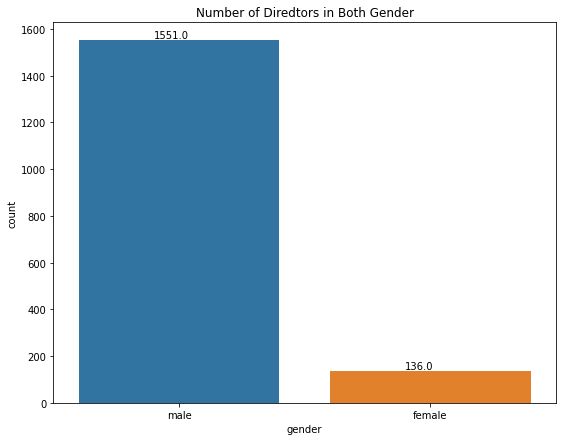

In [31]:
figure(figsize=(9,7))
ax = sns.countplot(x='gender',data= data_combined)

plt.title("Number of Diredtors in Both Gender")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))


<!-- <iframe src = "/img/bechdel/graph.png7" height = "350px" width = "100%"></iframe> -->

Next, I will visualize the gender of the director with the Bechdel score, to see if movies with female directors have a higher score.

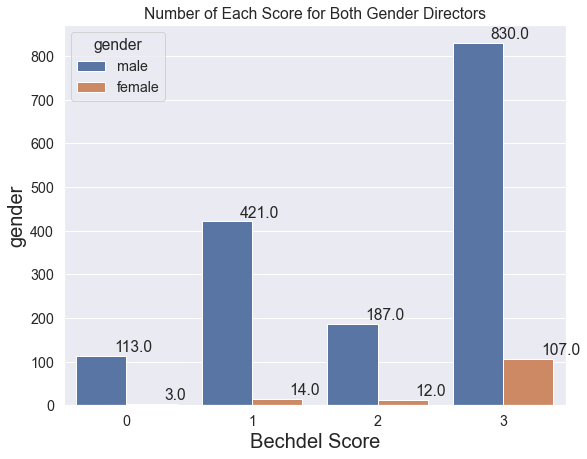

In [32]:
sns.set(font_scale=1.3)
figure(figsize=(9,7))
ax = sns.countplot(x='Bechdel Score',hue='gender',data=data_combined)
ax.set_xlabel('Bechdel Score',fontsize=20)
ax.set_ylabel('gender',fontsize=20)
plt.title("Number of Each Score for Both Gender Directors")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))


<!-- <iframe src = "/img/bechdel/graph.png8" height = "350px" width = "100%"></iframe> -->

Next, I will take a look at the variable budget, to see if there is any kind of correlation between the budget of a movie and it’s Bechdel score.

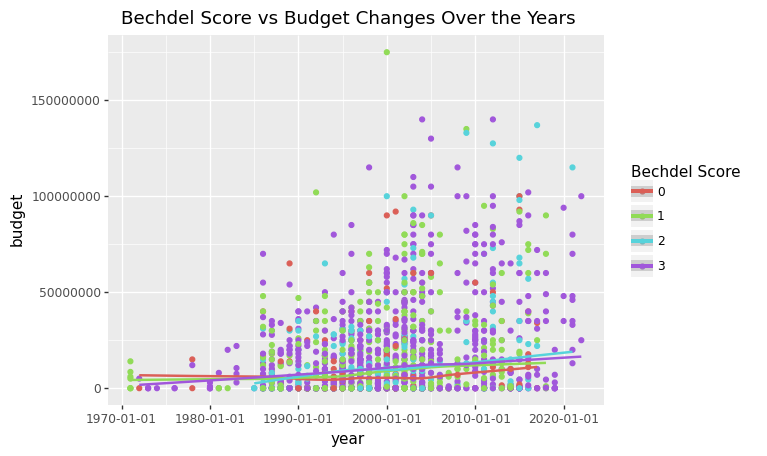

<ggplot: (8762740166012)>

In [33]:
data_combined['budget']=latest['budget']
ggplot(data_combined,aes(x = 'year', y ='budget' ,color='Bechdel Score'))+geom_point()+geom_smooth()+ ggtitle("Bechdel Score vs Budget Changes Over the Years")


<!-- <iframe src = "/img/bechdel/graph.png9" height = "350px" width = "100%"></iframe> -->

Now, I will visualize the relationship between budget and gender of the director:

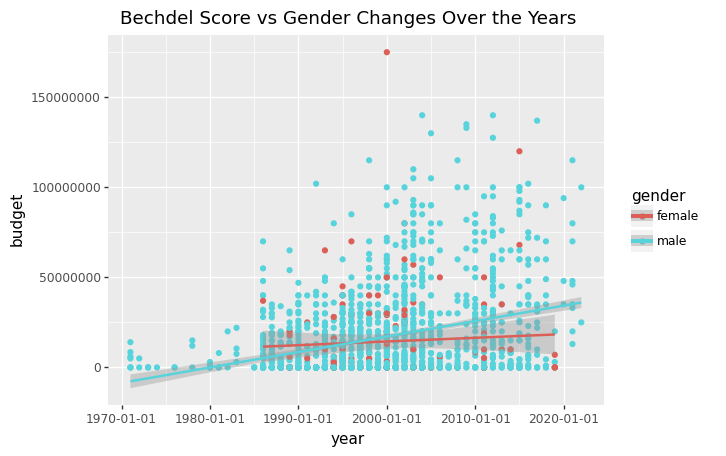

<ggplot: (8762622883904)>

In [34]:
data_combined['budget']=latest['budget']
# Visualize budget and gender of director
ggplot(data_combined,aes(x = 'year', y = 'budget',color='gender'))+\
geom_point()+geom_smooth()+\
ggtitle("Bechdel Score vs Gender Changes Over the Years")


<!-- <iframe src = "/img/bechdel/graph.png10" height = "350px" width = "100%"></iframe> -->

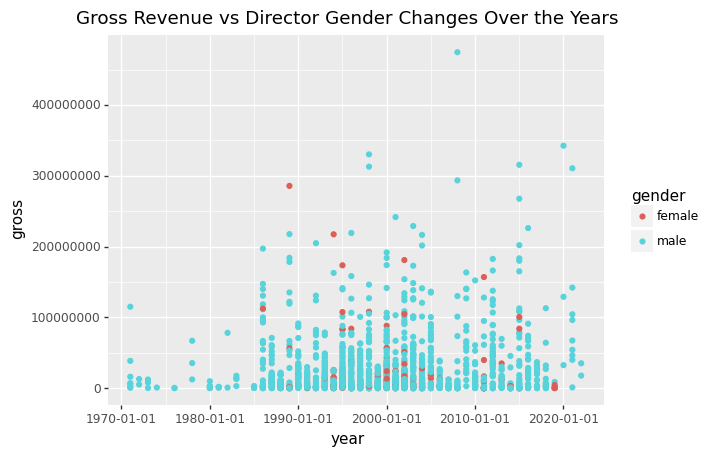

<ggplot: (8762724703166)>

In [35]:
data_combined['gross']=latest['gross']
ggplot(data_combined,aes(x = 'year', y = 'gross',color='gender'))+geom_point()+ ggtitle("Gross Revenue vs Director Gender Changes Over the Years")


<!-- <iframe src = "/img/bechdel/graph.png11" height = "350px" width = "100%"></iframe> -->

<dv class >
And that’s it! I managed to visualize relationships and answer all the data questions I set out to find answers to.

Some interesting data findings include:

1. Movies that fail the Bechdel test tend to have higher IMDB ratings.<br/>
2. Over the years, there has been an increasing number of movies that pass the Bechdel test.<br/>
3. Movies with female directors have higher Bechdel scores.
4. There is no clear correlation between the budget or revenue of a movie and its Bechdel score.
Of course, this analysis was only done with the data I gathered from three places, and might not represent the entire population of movies out there.

Furthermore, there may have been other variables present that affected the outcome of this analysis, and it might be a good idea to experiment with data from a couple of other places before coming to a conclusion.

Finally, I would like to mention that the Bechdel test is not necessarily the best benchmark to measure female representation in movies. It does not take into consideration how well written a female character is, neither does it measure meaningful depth of character.

However, it is one of the most well-known metrics used to expose gender bias and is the only test we have this kind of data on.

<dv class />